In [23]:
# titanic.pivot_table(index='Sex', values='Survived', aggfunc='count')

In [11]:
import pandas as pd
import seaborn as sns

In [12]:
tips = sns.load_dataset('tips')

In [14]:
titanic = pd.read_csv('train.csv')

In [15]:
flights = sns.load_dataset('flights')

In [17]:
iris = sns.load_dataset('iris')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [25]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#   For bivariate analysis there are three possibilities 

- Numerical - Numerical
- Numerical - Categorical
- Categorical - Categorical<br><br>
<b>By adding `hue(categorical)`, `style(categorical)` and `size(numerical)` it will be multivariate analysis</b>

# 1. Scatterplot (Numerical -Numerical)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

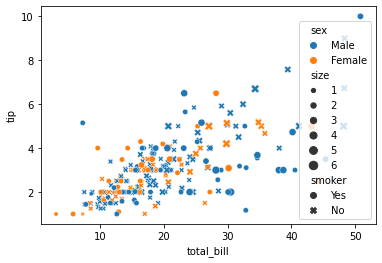

In [33]:
# Scatterplot using scatterplot method 
sns.scatterplot(x=tips['total_bill'],y=tips['tip'], hue=tips['sex'], style=tips['smoker'], size=tips['size'])

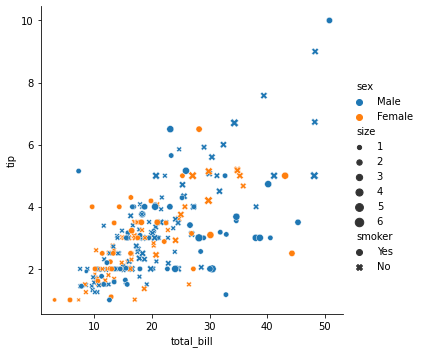

In [41]:
# Scatterplot using relplot method (same as above just different way to express)
sns.relplot(x=tips['total_bill'], y=tips['tip'],hue=tips['sex'], style=tips['smoker'], size=tips['size'], kind='scatter', data=tips)

# 2. Barplot ( Numerical - Categorical)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

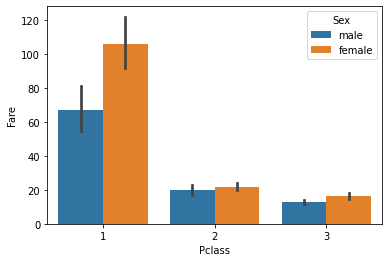

In [48]:
sns.barplot(x=titanic['Pclass'], y=titanic['Fare'], hue=titanic['Sex'])

# 3. Boxplot (Numerical - Categorical)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

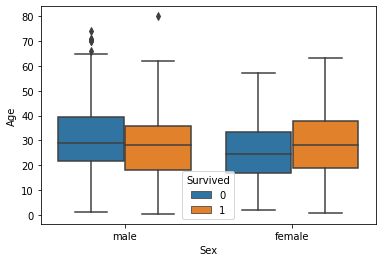

In [50]:
sns.boxplot(x=titanic['Sex'], y=titanic['Age'], hue=titanic['Survived'])

# 4. Distplot (Numerical - Categorical)
here we don't get default parameter for categorical values so we will create it using two graph

C:\Users\CeX\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\CeX\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

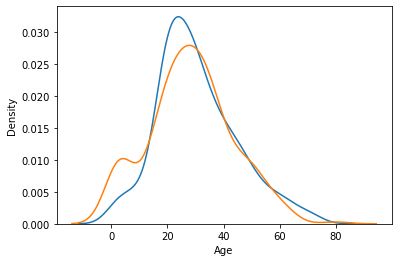

In [54]:
sns.distplot(titanic[titanic['Survived']==0]['Age'], hist=False)
sns.distplot(titanic[titanic['Survived']==1]['Age'], hist=False)

# 5. Heatmap (Categorical - Categorical)

In [55]:
titanic.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [57]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [89]:
pd.crosstab(titanic['Pclass'], titanic['Survived']).apply(lambda x: round((x/x.sum())*100,2), axis=1)

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

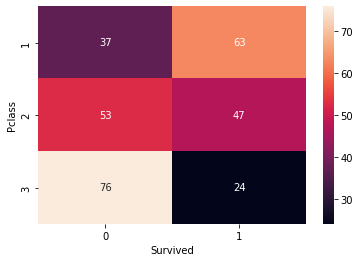

In [90]:
sns.heatmap(pd.crosstab(titanic['Pclass'], titanic['Survived']).apply(lambda x: round((x/x.sum())*100,2), axis=1), annot=True)

In [84]:
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

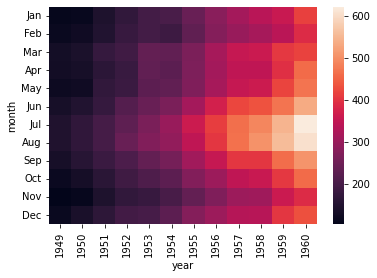

In [85]:
sns.heatmap(flights.pivot_table(index='month', columns='year', values='passengers'))

# 6. Clustermap (Categorical - Categorical)
It groups the similar behaving columns and indexes together

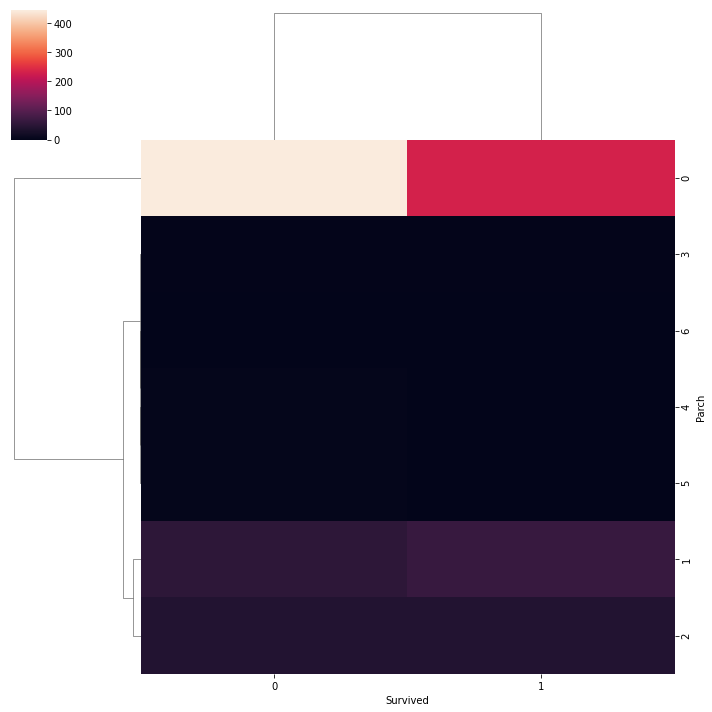

In [67]:
sns.clustermap(pd.crosstab(titanic['Parch'], titanic['Survived']))

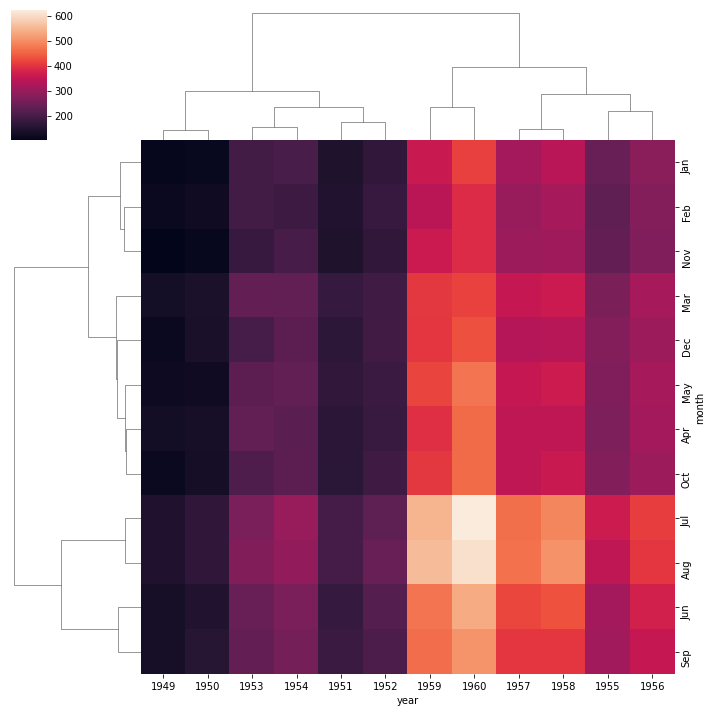

In [87]:
sns.clustermap(flights.pivot_table(index='month', columns='year', values='passengers'))

# 7. Pairplot
It plots graphs between every numerical column with another numerical column

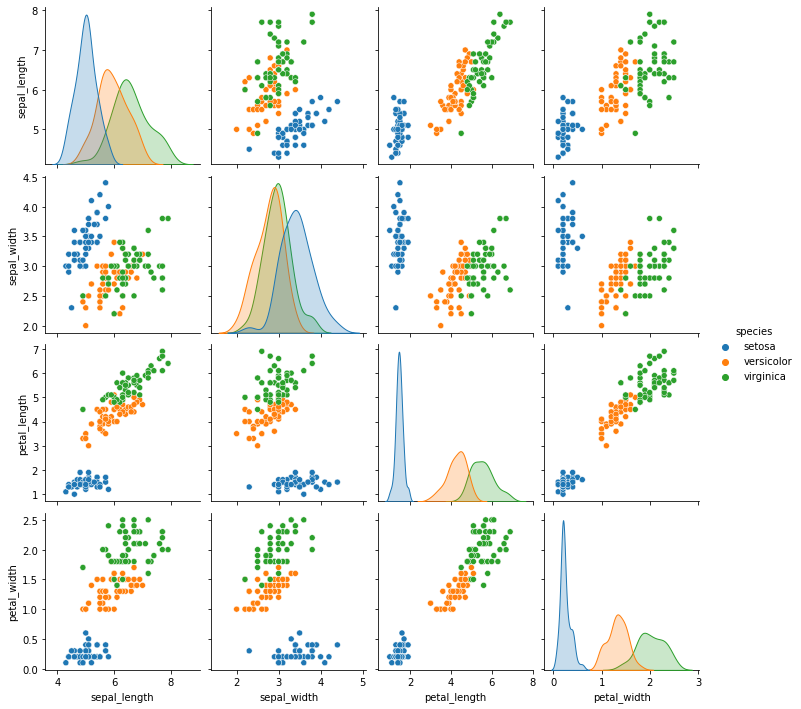

In [69]:
sns.pairplot(iris, hue='species')

# 8. Lineplot (Numerical -Numerical)
Genraly use for time based values (eg. date and stock price, year and growth in sales, etc)

In [70]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [78]:
new = flights.groupby('year').sum().reset_index()
new.head(3)

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042


<AxesSubplot:xlabel='year', ylabel='passengers'>

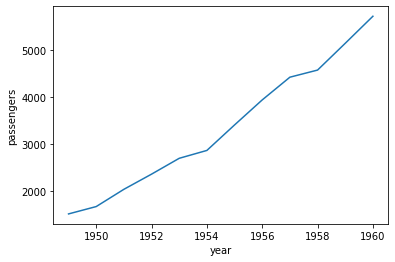

In [81]:
sns.lineplot(x=new['year'],y=new['passengers'])